In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torchvision 
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def imshow(inp, title=None):
    """ IMshow for Tensor"""
    inp=inp.numpy().transpose((1,2,0))
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.299,0.244,0.255])
    inp= std * inp + mean
    inp=np.clip(inp,0,1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [3]:
def data_load():
    data_transform=transforms.Compose([transforms.Resize([512,512]), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    data_dir='E:/image_model/vehicle'
    image_datasets=datasets.ImageFolder(data_dir,transform=data_transform)
    train_loader=torch.utils.data.DataLoader(dataset=image_datasets, batch_size=2, shuffle=True)
    return train_loader,image_datasets
    

In [4]:
# model class
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn1=nn.Conv2d(in_channels=3, out_channels=16,kernel_size=5,stride=1,padding=2)
        self.relu=nn.ReLU()
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        self.cnn2=nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.relu2=nn.ReLU()
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(32*128*128,7)
    
    def forward(self,x):
        out=self.cnn1(x)
        out=self.relu(out)
        out=self.maxpool1(out)
        out=self.cnn2(out)
        out=self.relu2(out)
        out=self.maxpool2(out)
        out=out.view(out.size(0),-1)
        out=self.fc1(out)
        return out

In [5]:
train_loader,image_datasets=data_load()

In [6]:
model=CNNModel()

In [7]:
criterion=nn.CrossEntropyLoss()
learning_rate=0.001
optimizer=optim.SGD(model.parameters(),lr=learning_rate)


In [8]:
# model training
num_epochs=5
iter=0
batch_size=2

for epoch in range(num_epochs):
    for i, (images, labels)in enumerate(train_loader):
        images=Variable(images)
        labels=Variable(labels)
        optimizer.zero_grad()
        output=model(images)
        loss=criterion(output, labels)
        loss.backward()
        optimizer.step()
        iter =iter +1
        print('Epoch [%d/%d],Iter [%d/%d] Loss : %.4f' %(epoch+1,num_epochs,i+1,len(image_datasets)//batch_size,loss[0]))
        


C:\Users\admin\Anaconda3\envs\pyt\lib\site-packages\ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


Epoch [1/5],Iter [1/20] Loss : 2.0231
Epoch [1/5],Iter [2/20] Loss : 8.3074
Epoch [1/5],Iter [3/20] Loss : 1.7041
Epoch [1/5],Iter [4/20] Loss : 0.5121
Epoch [1/5],Iter [5/20] Loss : 0.0830
Epoch [1/5],Iter [6/20] Loss : 0.4256
Epoch [1/5],Iter [7/20] Loss : 0.6794
Epoch [1/5],Iter [8/20] Loss : 15.4304
Epoch [1/5],Iter [9/20] Loss : 5.1570
Epoch [1/5],Iter [10/20] Loss : 1.9374
Epoch [1/5],Iter [11/20] Loss : 1.8526
Epoch [1/5],Iter [12/20] Loss : 1.5544
Epoch [1/5],Iter [13/20] Loss : 2.2488
Epoch [1/5],Iter [14/20] Loss : 1.5938
Epoch [1/5],Iter [15/20] Loss : 1.7798


C:\Users\admin\Anaconda3\envs\pyt\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


Epoch [1/5],Iter [16/20] Loss : 1.3760
Epoch [1/5],Iter [17/20] Loss : 1.2653
Epoch [1/5],Iter [18/20] Loss : 1.9910
Epoch [1/5],Iter [19/20] Loss : 0.7026
Epoch [1/5],Iter [20/20] Loss : 0.7192
Epoch [2/5],Iter [1/20] Loss : 3.2769
Epoch [2/5],Iter [2/20] Loss : 1.0586
Epoch [2/5],Iter [3/20] Loss : 1.6973
Epoch [2/5],Iter [4/20] Loss : 1.0649
Epoch [2/5],Iter [5/20] Loss : 1.6599
Epoch [2/5],Iter [6/20] Loss : 0.5344
Epoch [2/5],Iter [7/20] Loss : 0.7225
Epoch [2/5],Iter [8/20] Loss : 1.1926
Epoch [2/5],Iter [9/20] Loss : 1.7464
Epoch [2/5],Iter [10/20] Loss : 1.4272
Epoch [2/5],Iter [11/20] Loss : 0.5538
Epoch [2/5],Iter [12/20] Loss : 1.4001
Epoch [2/5],Iter [13/20] Loss : 0.3641
Epoch [2/5],Iter [14/20] Loss : 1.3932
Epoch [2/5],Iter [15/20] Loss : 1.7646
Epoch [2/5],Iter [16/20] Loss : 0.9176
Epoch [2/5],Iter [17/20] Loss : 0.7094
Epoch [2/5],Iter [18/20] Loss : 1.1012
Epoch [2/5],Iter [19/20] Loss : 1.1644
Epoch [2/5],Iter [20/20] Loss : 0.4914
Epoch [3/5],Iter [1/20] Loss : 0.2

### testing

In [9]:
def data_load1():
    data_transform=transforms.Compose([transforms.Resize([512,512]), transforms.ToTensor(), transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])])
    data_dir='E:/testimg'
    image_datasets=datasets.ImageFolder(data_dir,transform=data_transform)
    train_loader=torch.utils.data.DataLoader(dataset=image_datasets, batch_size=2, shuffle=True)
    return train_loader

In [10]:
train_loader22=data_load1()

In [11]:
imagex=train_loader22
print(imagex)

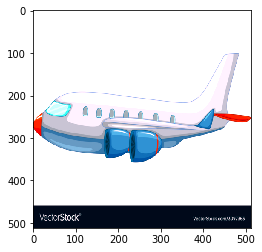

tensor([0])
prediction-- aeroplane


In [12]:
labels_h=('aeroplane','bike','car','truck')
for i , (a,b) in enumerate(train_loader22):
    imshow(torchvision.utils.make_grid(a))
    images1=Variable(a)
    labels1=Variable(b)
    outputs1=model(a)
    _,predicted=torch.max(outputs1.data,1)
    print(predicted)
    print("prediction--", labels_h[predicted[0]])